**Plan**

- Reminders
- What does model.compile(...) mean?
- What is exactly model.fit(...)?
- Regularization layers
- Side note: Save and load models

# 0. Reminders

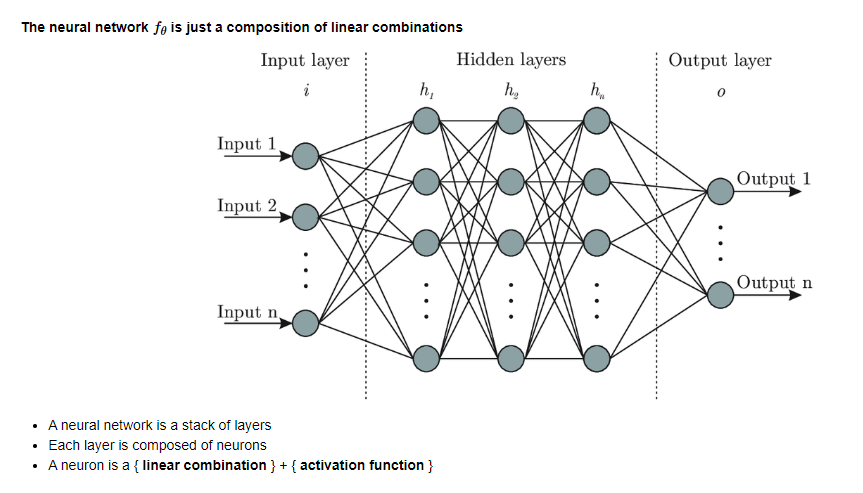

**Keras Library**

We use the [Keras](https://www.tensorflow.org/api_docs/python/tf/keras) library to build neural networks.

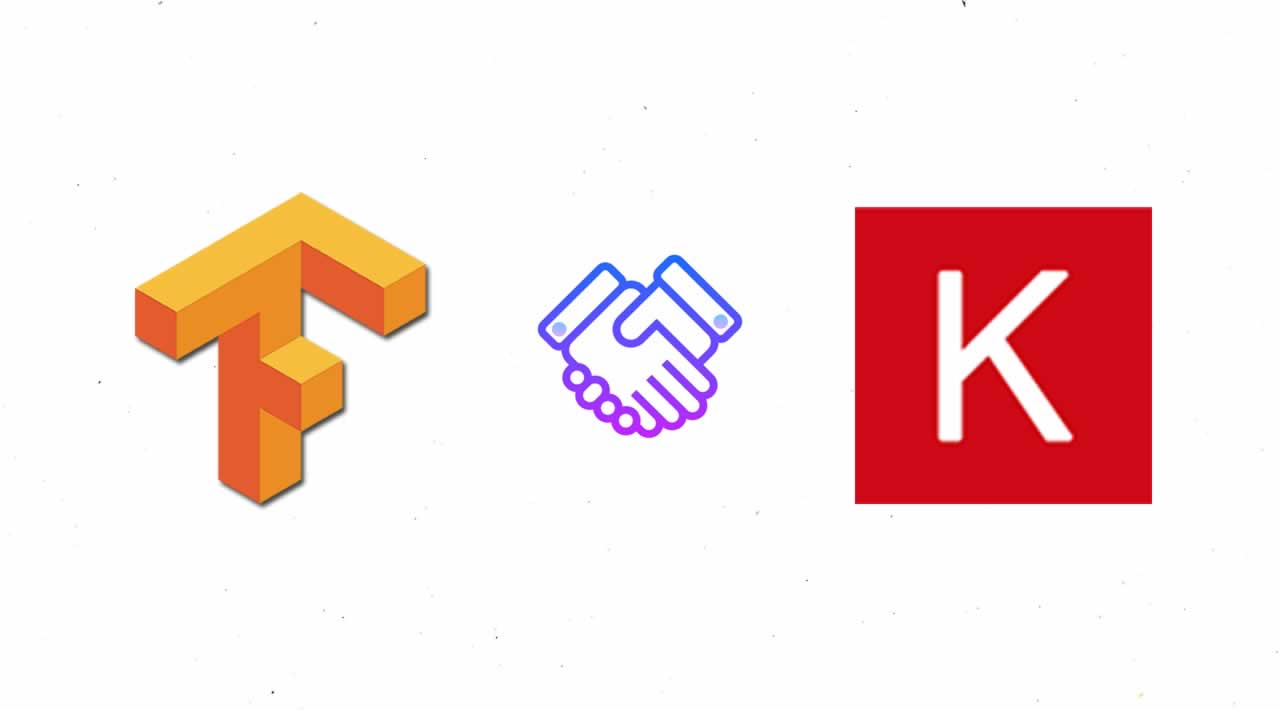

- Keras lives now within the [Tensorflow package(https://www.tensorflow.org/)] (developed by Google, which also developed the [Tensorflow Playground](https://playground.tensorflow.org) ).
- You have to import `tensorflow.keras` instead of `keras`

- Check the [Tensorflow Keras](https://www.tensorflow.org/guide/keras?hl=fr) documentation, not the [Keras](https://keras.io/) documentation.

- Keras has fast evolving code & documentation

**A neural network is fully specified in three steps**

In [ ]:
###### Keras cheatsheet ######

# STEP 1: ARCHITECTURE
model = Sequential()
model.add(layers.Dense(100, input_dim=128, activation='relu'))  # /!\ Must specify input size
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='softmax')) # /!\ Must correspond to the task at hand

# STEP 2: OPTIMIZATION METHODS
model.compile(loss='categorical_crossentropy', optimizer='adam')

# SETP 3: DATA AND FITTING METHODS
model.fit(X, y, batch_size=32, epochs=100)

**The last layer must correspond to the task at hand**

In [ ]:
### REGRESSION WITH 1 OUTPUT
model.add(layers.Dense(1, activation='linear'))


### REGRESSION WITH 16 OUTPUTS
model.add(layers.Dense(16, activation='linear'))


### CLASSIFICATION WITH 2 CLASSES
model.add(layers.Dense(1, activation='sigmoid'))


### CLASSIFICATION WITH 14 CLASSES
model.add(layers.Dense(14, activation='softmax')

# 1. Compiling

```
model.compile(loss=..., 
              optimizer=..., 
              metrics=...)
```

This corresponds to the way the Neural Network optimizes its parameters θ.

In [ ]:
# REGRESSION
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

# CLASSIFICATION WITH 2 CLASSES
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# CLASSIFICATION WITH N (let's say 14) CLASSES
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'precision'])

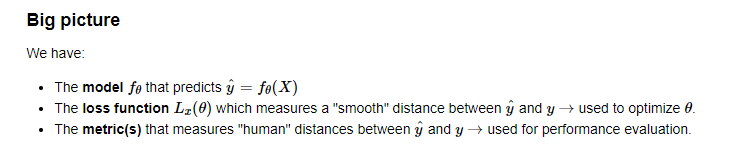

## 1.1 The `metrics`

= human measures of how good the predictions are

→ computed by **forward propagation** at each epoch

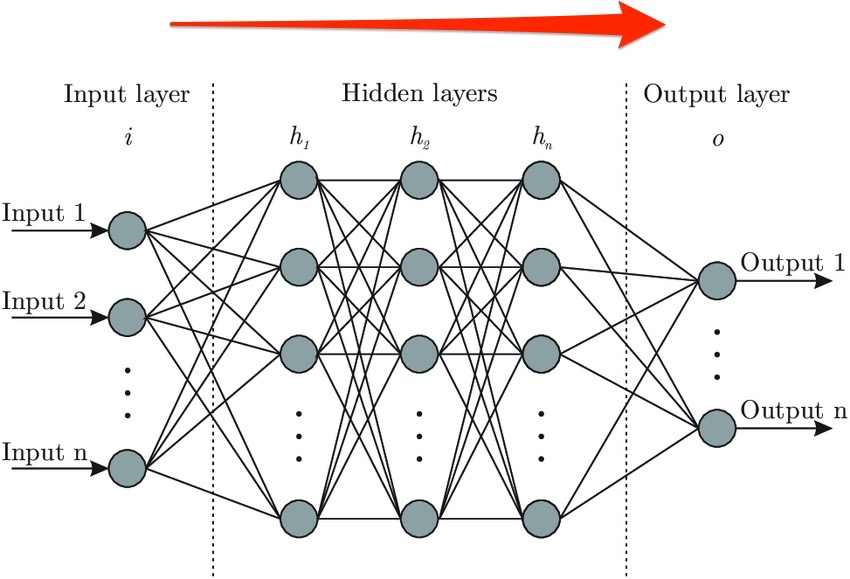

🤔 What do we mean by forward propagation ?

👇 Let's illustrate it through a quite simple Neural Network:

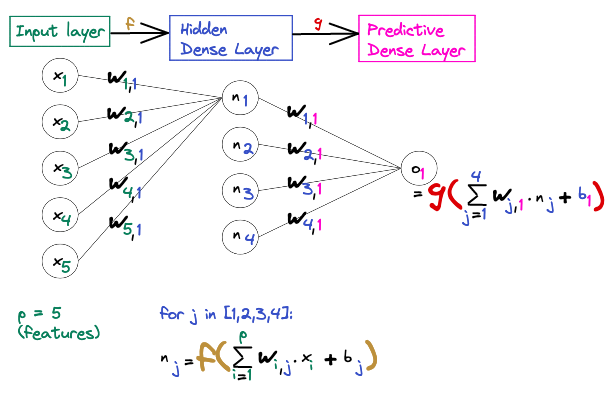

❓ How many parameters does this neural network have ❓

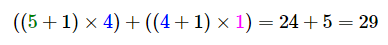

**💡 [Forward Propagation](https://github.com/lewagon/data-images/blob/master/DL/forward_pass_graph.png?raw=true) = 1 matrix multiplication per layer**

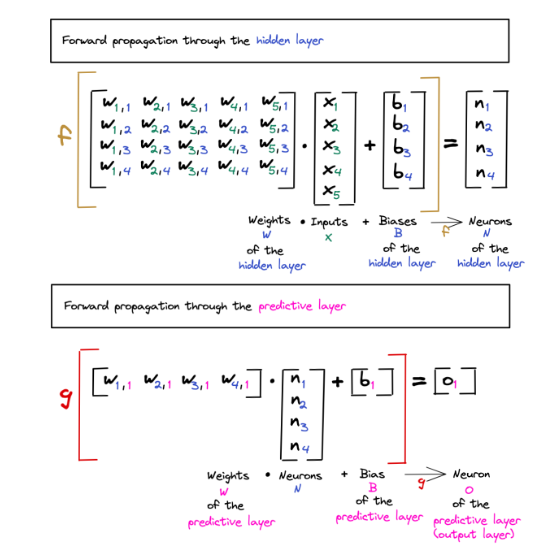
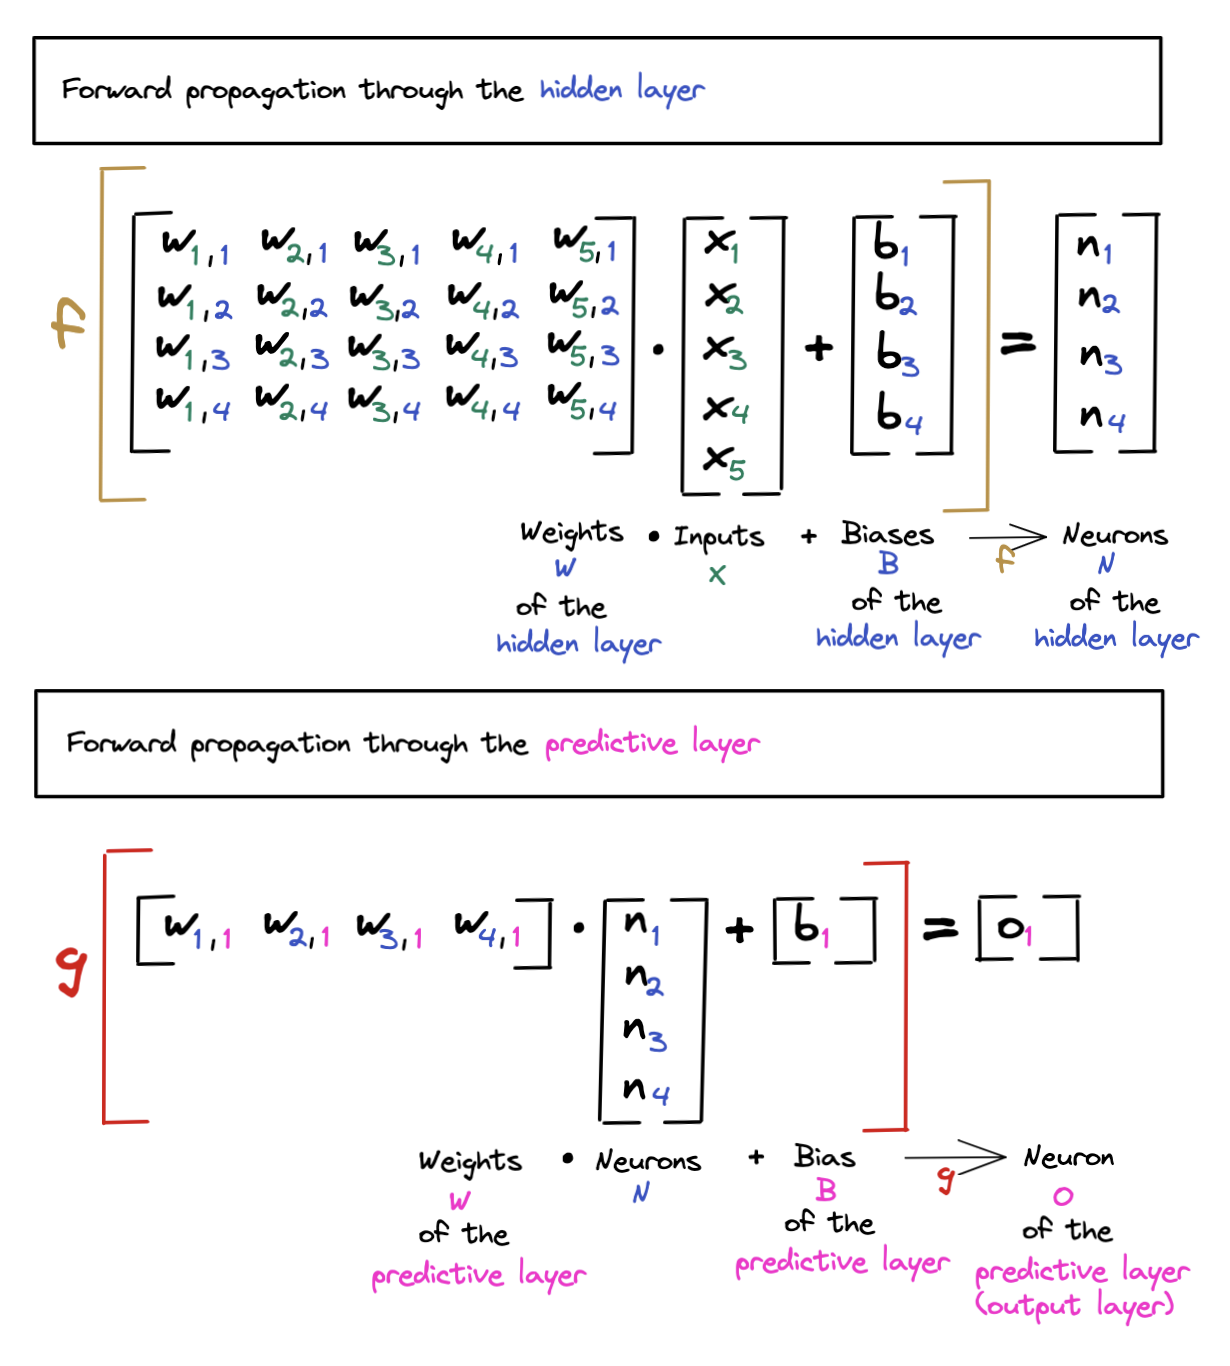

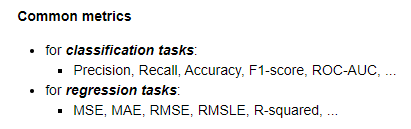

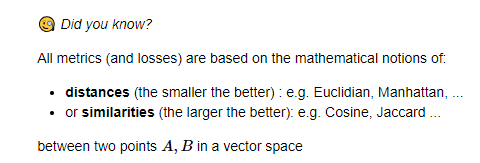

📚 [Read more](https://aiaspirant.com/distance-similarity-measures-in-machine-learning/)

In Keras (📚 [Docs about the metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)):

In [ ]:
# use strings for quick access
model.compile(metrics=['accuracy', 'precision'])

# use Keras metric objects for fine-tuning
metric = keras.metrics.AUC(
    num_thresholds = 200,
    curve='ROC', # or curve='PR'
)
model.compile(metric=metric)

# Custom metrics
def custom_mse(y_true, y_pred):
    squared_diff = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_diff)

model.compile(metrics=[custom_mse])

💻 Do not hesitate to play with `Tensor` objects, they are quite similar to Numpy `Array`

In [1]:
import tensorflow as tf

X = tf.ones((3,3))
X

2024-01-18 00:35:30.479419: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-18 00:35:30.688335: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-18 00:35:30.688392: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-01-18 00:35:30.734828: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-18 00:35:31.829987: W tensorflow/stream_executor/platform/de

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [2]:
X.numpy()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

## 1.2 The loss function  $ L_x(\theta) $

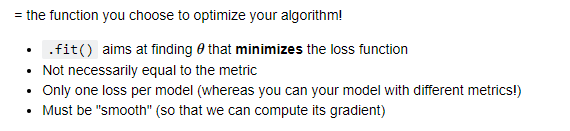

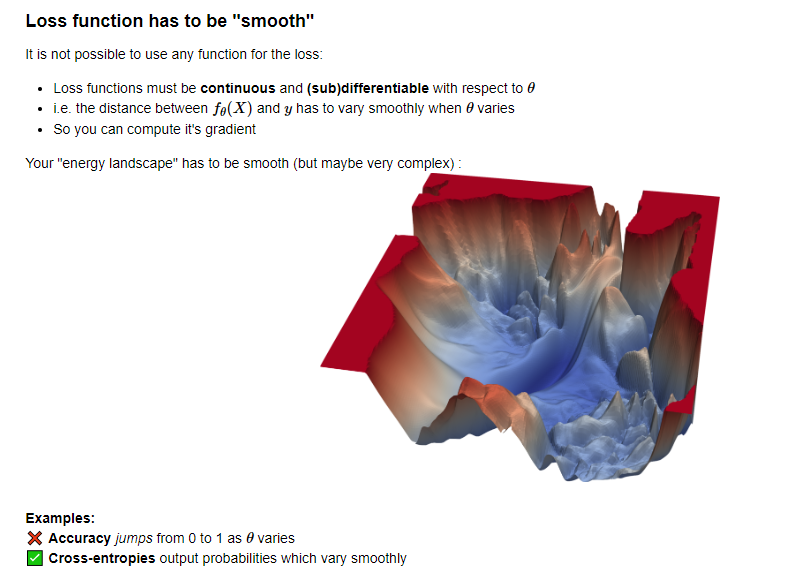

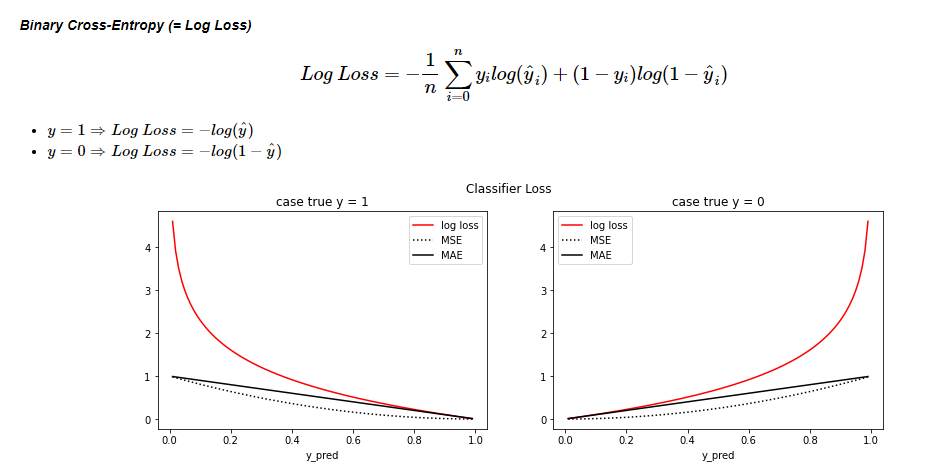

💡 The "Cross-Entropy" name comes from [📺 Shannon's Information Theory](https://www.youtube.com/watch?v=ErfnhcEV1O8)

In Keras?

In [ ]:
# use strings for quick access
model.compile(loss = "binary_crossentropy")


# use Keras metric objects for fine-tuning
loss = keras.losses.BinaryCrossentropy(...)
model.compile(loss = loss)

# Custom losses
def custom_mse(y_true, y_pred):
    squared_diff = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_diff)

model.compile(loss=custom_mse)

Pick a loss available in the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

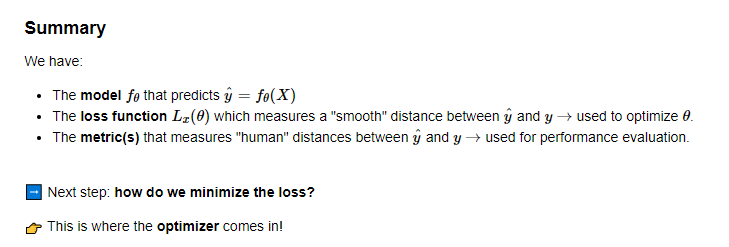


# 2. The `optimizer`

[Backpropagation gif](https://miro.medium.com/v2/resize:fit:640/format:webp/1*VF9xl3cZr2_qyoLfDJajZw.gif)

## 2.1 Forward vs. Backward Propagation

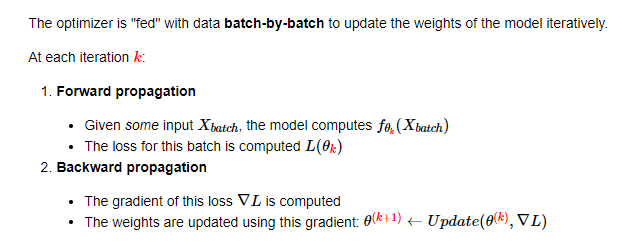

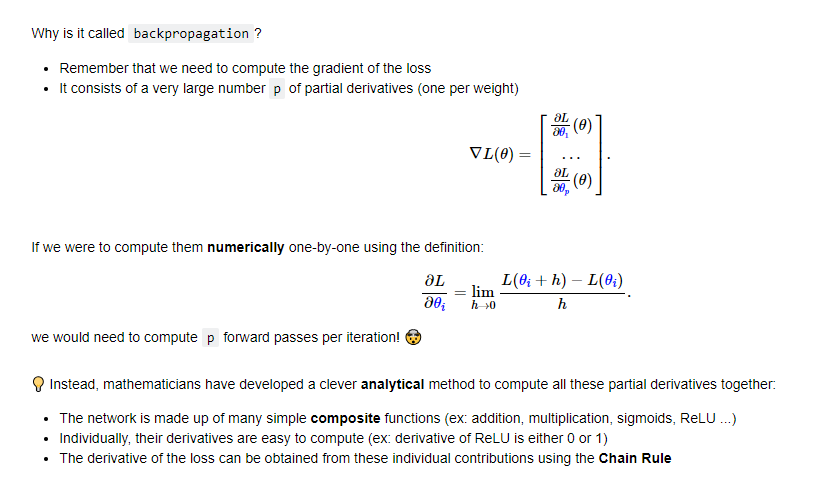

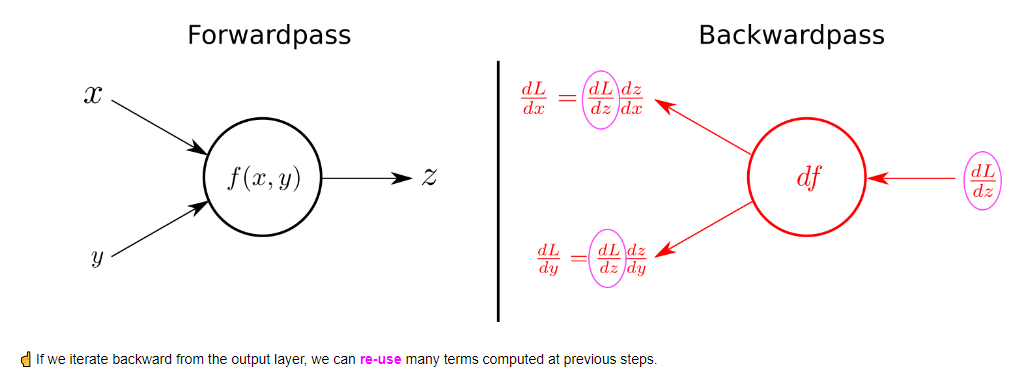

[📺 Khan Academy - Chain Rule (5 min)](https://www.youtube.com/watch?v=0T0QrHO56qg)

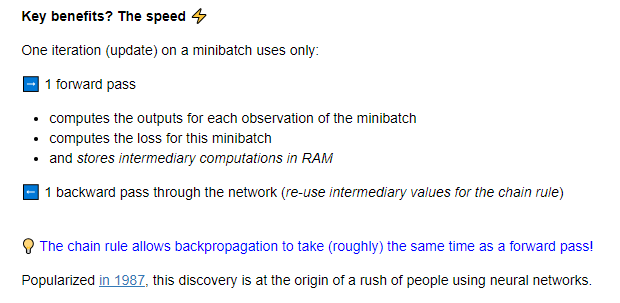

❗️ **Vanishing gradient** phenomenon ❗️

> The weights of the first (deeper) layers are **harder** to move than from the last layer (outputs)

[Vanishing Gradient Gif](https://miro.medium.com/max/480/1*Ku54qmCryZVBaIc6g8rjGA.gif)

Resource : [3Blue1Brown](https://www.youtube.com/watch?v=Ilg3gGewQ5U)

## 2.2 Which optimizer to choose?

Simple gradient descent is not good enough in Deep Learning.
Loss functions are too complex and the optimizer gets stuck at **local minima**.

The [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) offers multiple choices: Adam, SGD, RMSProp, Adadelta, ...


[1st Example Gif](https://miro.medium.com/max/800/1*zVi4ayX9u0MQQwa90CnxVg.gif)

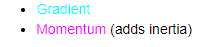

[2nd Example Gif](https://miro.medium.com/max/1400/1*47skUygd3tWf3yB9A10QHg.gif)

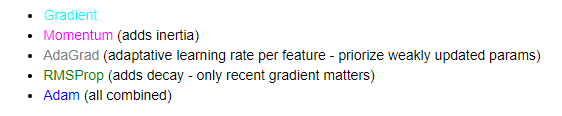


[Source](https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c)

> **Adam = best choice of optimizer to start with**

# 3. `optimizer` hyper-parameters

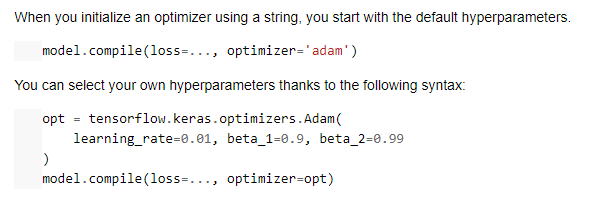

## 3.1 `learning_rate`

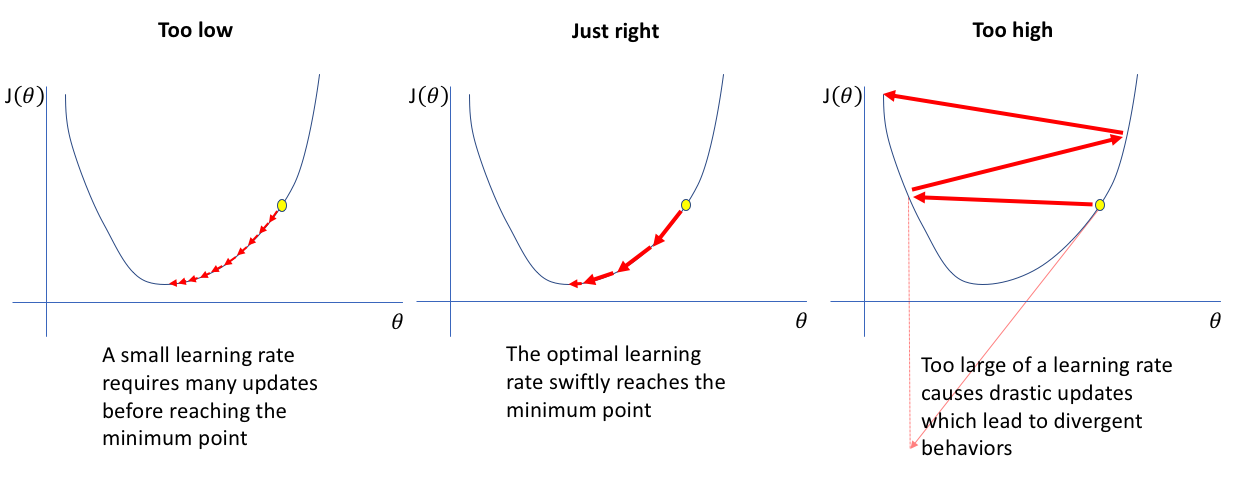

- Start with the default implementation.
- Think about this rate as the **amount of change on the weights you want at each update**.
- Smaller rates will require more epochs

💡 For a deeper understanding of the learning rate, let's check this animation.

🏋🏽‍♂️ : [Schedulers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) offer some clever ways to have a changing learning rate during training.

## 3.2 `batch_size`

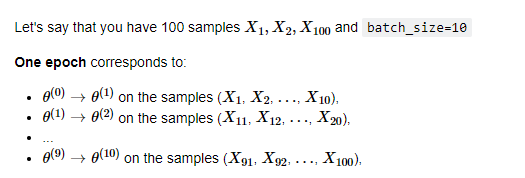
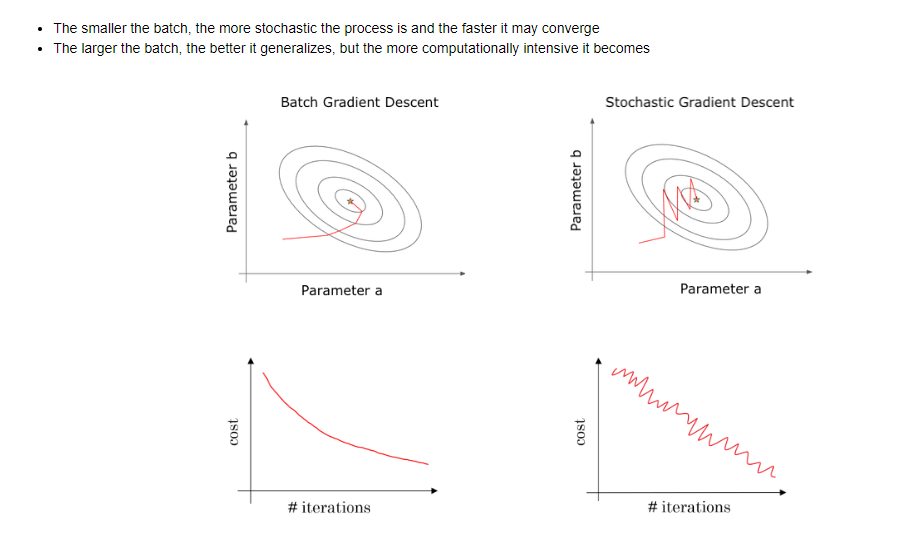

**Which batch size to choose?**

Yann Le Cun has an answer for you:

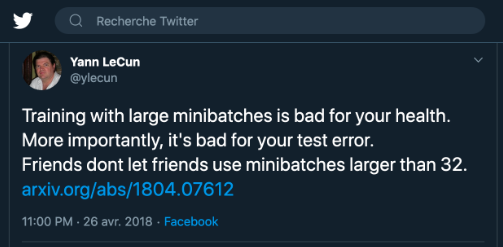


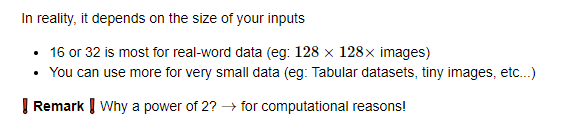

## 3.3 `epochs` number?

❗ The larger the batch size, the more epochs you will need ❗

**How many epochs?**

It does not matter, as many as possible as long as the neural network is able to generalize to unseen data.

**🤔 When does my model start overfitting?**

💡 Hint: Do NOT use your real test set.

<br>

**Train/Val/Test split**

❗️ If you use the test set to stop your algorithm (to prevent overfitting), you use the test set to optimize your algorithm. ❗️

To prevent this type of data leakage, instead of estimating the loss on the test set, we do it on part of the training set. We call this the **validation set**.

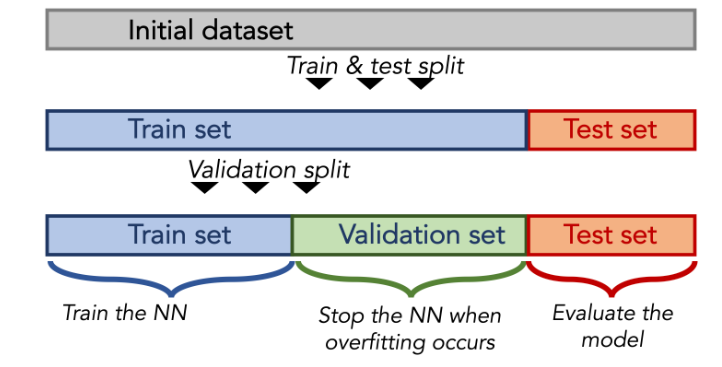
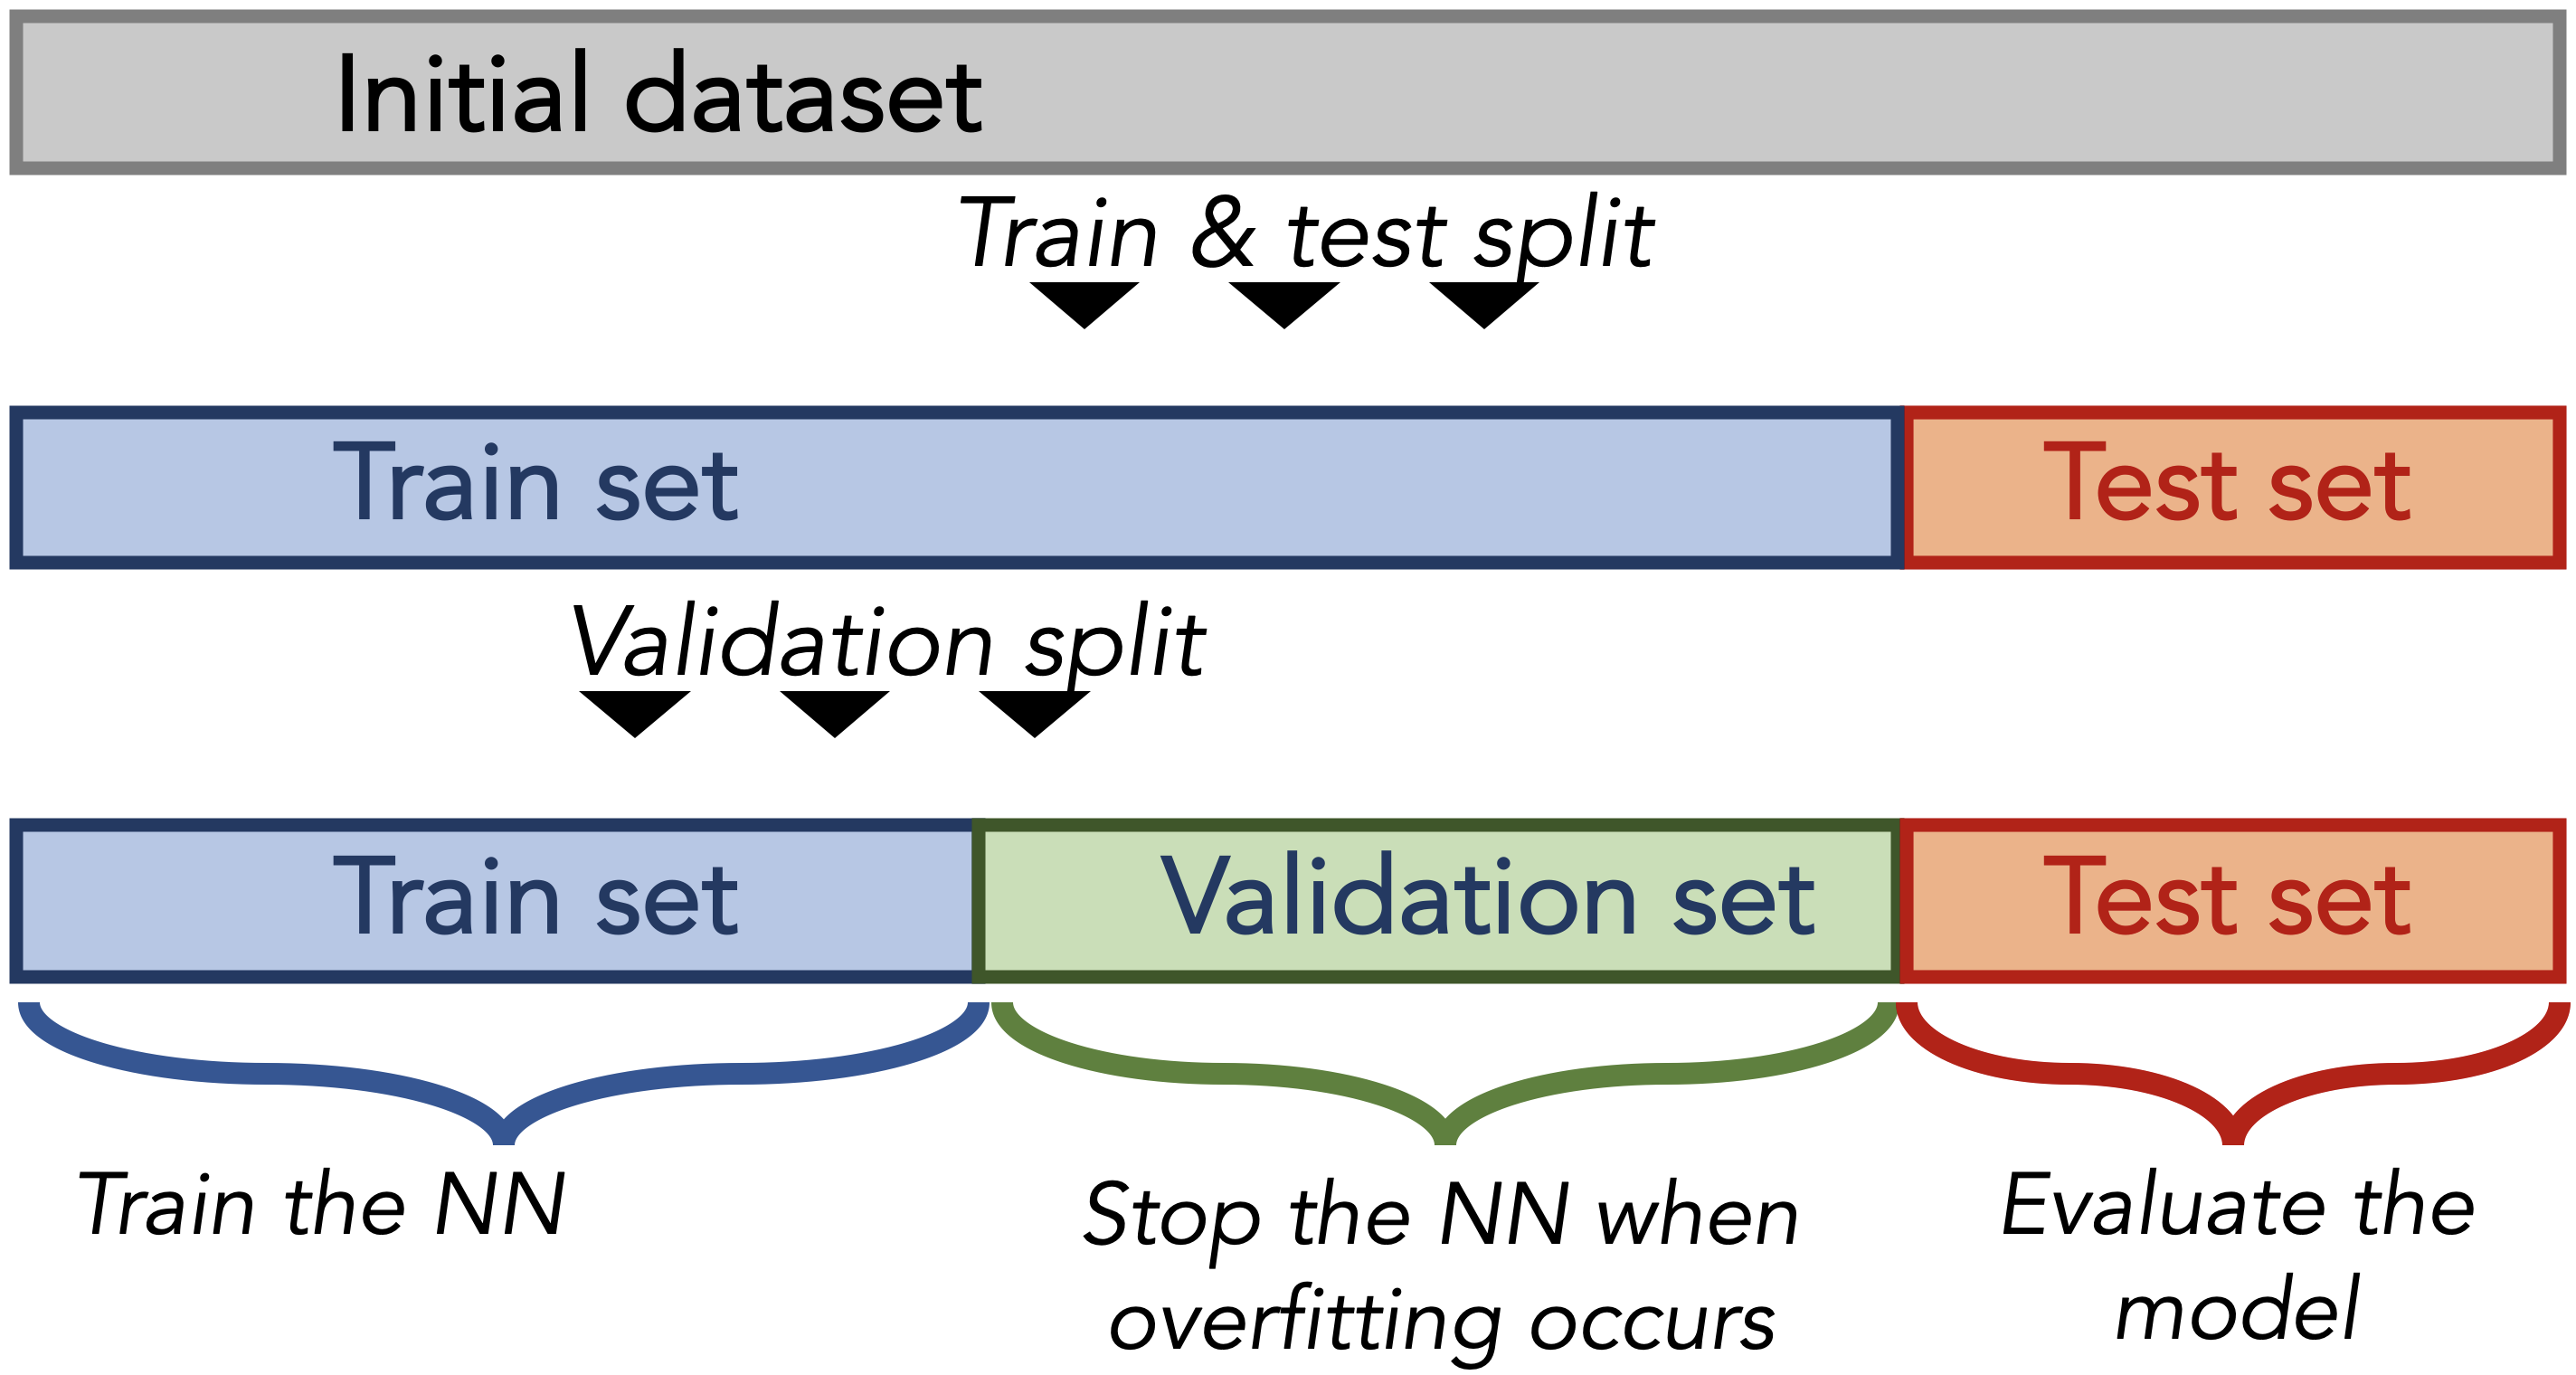

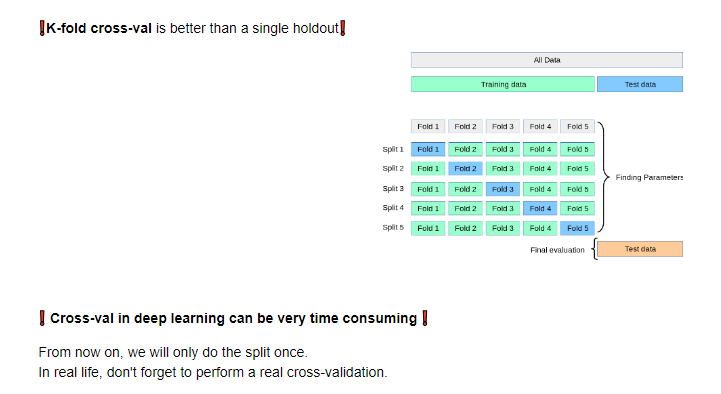

In Keras, we have two options:

In [ ]:
# Give validation set explicitly
history = model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          batch_size=16,
          epochs=100)

Or, use directly the `validation_split` keyword:

In [ ]:
history = model.fit(X_train, y_train,
          validation_split=0.3, # /!\ LAST 30% of train indexes are used as validation
          batch_size=16,
          epochs=100,)
          # shuffle=True) # Training data is shuffled at each epoch by default 👌

Your `history` may then look like this:

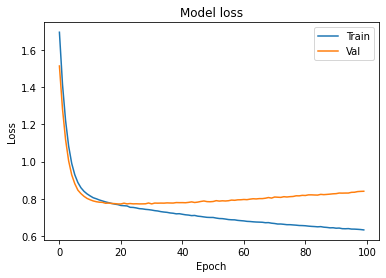

## 3.4 `Early stopping`

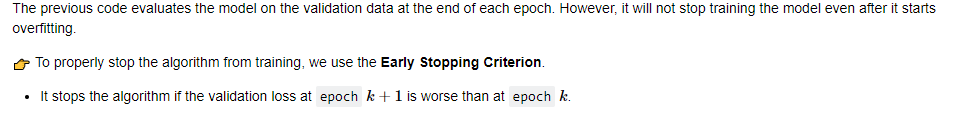

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping()

model.fit(X_train, y_train,
          batch_size=16,
          epochs=1000,
          validation_split=0.3,
          callbacks=[es])

# "callback" means that the early stopping criterion
# will be called at the end of each epoch

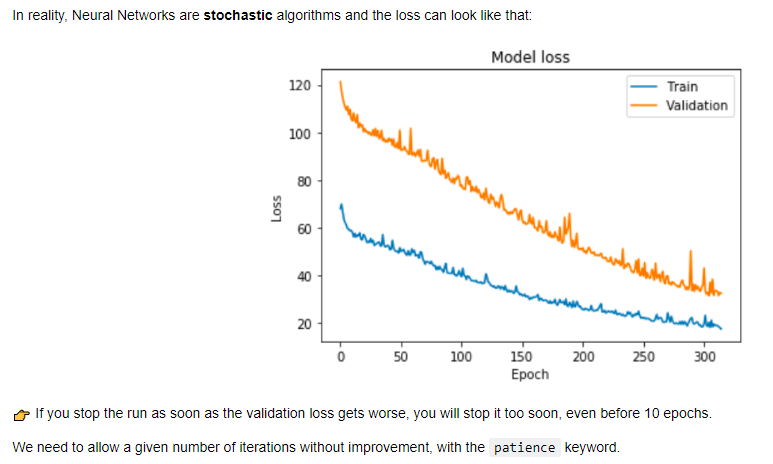

In [ ]:
es = EarlyStopping(patience=20)

model.fit(X_train, y_train,
          batch_size=16,
          epochs=1000,
          validation_split=0.3,
          callbacks=[es])

👇 same patience but restores the weights that correspond to the best validation loss:

In [ ]:
es = EarlyStopping(patience=20, restore_best_weights=True)

model.fit(X_train, y_train,
          batch_size=16,
          epochs=1000,
          validation_split=0.3,
          callbacks=[es])

# 4. Regularization

All the previous steps are somewhat mandatory: they are fundamental to building a Neural Network.

However, in practice, you might still feel lost as to how to design the neural network architecture.

This is absolutely normal when you begin.

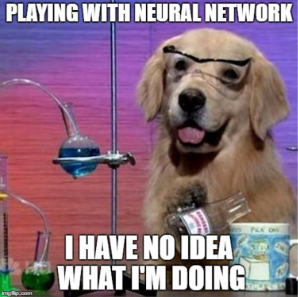
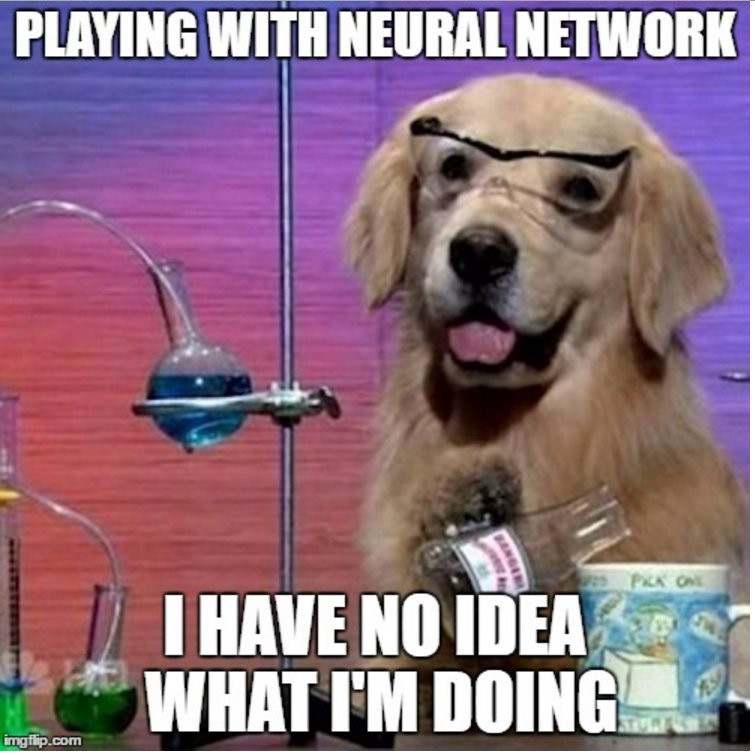

The art of Deep Learning is not to build the best architecture at first sight...

... but to try an initial architecture...
... and **know what to change to improve it according to the results**!

This is why practice is so important.

For instance, a common problem is that a Neural Network is **overfitting**! How do we solve it?

<br>

✅ **Early Stopping** criterion stops the model from learning before it overfits.

✅ **Regularization layers** really try to prevent your Neural Net from overfitting (📚 [documentation](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)).

## 4.1 Regularizers (L1, L2)

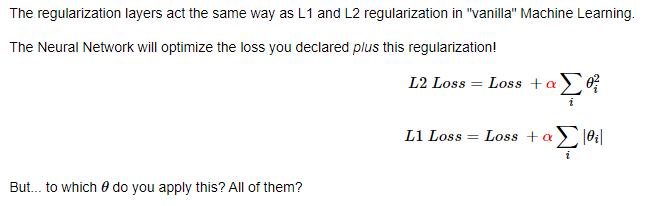
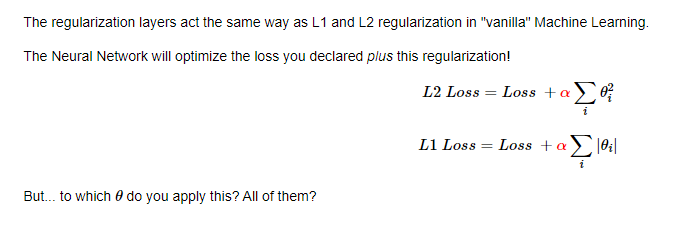

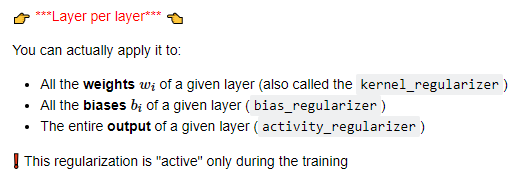

In [3]:
from tensorflow.keras import regularizers, Sequential, layers

reg_l1 = regularizers.L1(0.01)
reg_l2 = regularizers.L2(0.01)
reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

model = Sequential()

model.add(layers.Dense(100, activation='relu', input_dim=13))
model.add(layers.Dense(50, activation='relu', kernel_regularizer=reg_l1))
model.add(layers.Dense(20, activation='relu', bias_regularizer=reg_l2))
model.add(layers.Dense(10, activation='relu', activity_regularizer=reg_l1_l2))
model.add(layers.Dense(1, activation='sigmoid'))

❓ What is the number of additional parameters induced by the regularization ❓

In [4]:
# Answer: zero additional parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 7,691
Trainable params: 7,691
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Indeed: for instance layer 2 is regularized
# yet has usual number of parameters
(100 + 1) * 50

5050

## 4.2 Dropout layer

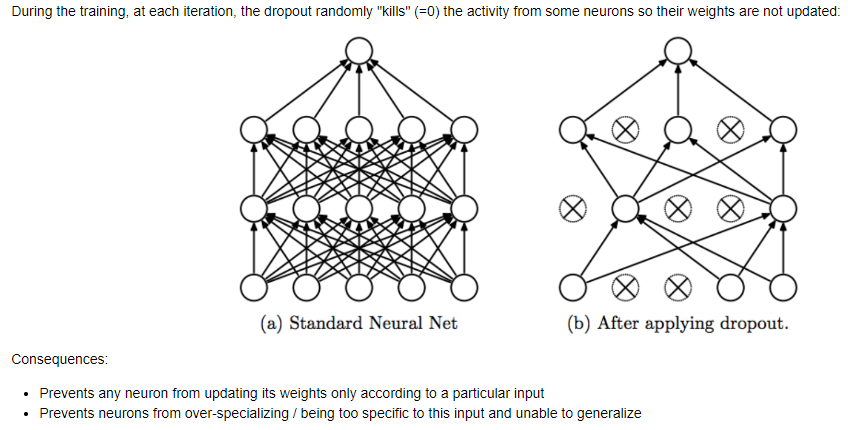

In [6]:
model = Sequential()

model.add(layers.Dense(20, activation='relu', input_dim=56))
model.add(layers.Dropout(rate=0.2))  # The rate is the percentage of neurons that are "killed"

model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(3, activation='softmax'))


# —— What is the number of parameters of the Dropout layer?

In [7]:
# Zero additional parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                1140      
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,383
Trainable params: 1,383
Non-trainable params: 0
_________________________________________________________________


# Pro Tips 💡

**[Strongly recommended]**

- Start your model from the **last layer**
- Implement the **easiest architecture** first
- Stick with the same **batch size** (eg. 32 for large data, more if it fits on RAM). Change it only once your are confident about its impact.
- Don't think about the number of **epochs**: it has to hit your early_stopping criterion

***[Apply wisely]***

- Try to make your model **overfit** before regularizing (it is good to see that your model does learn, even too much!)
- If you can't overfit, try fine-tuning your **learning rate** (or change the model's architecture)
- If train loss was on a steep decreasing trajectory when hitting early stopping, chances are that **regularization** will improve performance
- Only then, you can regularize
- Try to regularize the last layers before the first ones

# One last thing: Save and load models

**❗️Warning❗️** This section will be extremely important for the Data Science Projects.

- There are numerous reasons you might want to save your model, send it to someone that can load and use it.

- There are [many options](https://www.tensorflow.org/tutorials/keras/save_and_load) to do that. Let's see one of them.

In [ ]:
from tensorflow.keras import models

# Let's say that you have a `model`
# You can save it:
models.save_model(model, 'my_model')

# and you can load it somewhere else:
loaded_model = models.load_model('my_model')

# Bibliography

[📚 In what sense is backprop a fast algorithm](http://neuralnetworksanddeeplearning.com/chap2.html#in_what_sense_is_backpropagation_a_fast_algorithm)

[📺 3Blue1Brown - Neural Networks - (Whole series is incredible)](https://www.youtube.com/watch?v=Ilg3gGewQ5U)

[📺 Stanford - Graphs, and backpropagation - 1h20](https://youtu.be/d14TUNcbn1k?t=157)